In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import minimize


In [7]:


# Define the SIRV model
def sirv_model(y, t, beta, gamma, nu):
    """
    Function to calculate the derivatives of the SIRV model.
    
    Parameters:
        y: array containing the current values of the compartments [S, I, R, V]
        t: time
        beta: infection rate
        gamma: recovery rate
        nu: vaccination rate
        
    Returns:
        dydt: array containing the derivatives of the compartments [dS/dt, dI/dt, dR/dt, dV/dt]
    """
    S, I, R, V = y
    dSdt = -beta * S * I - nu * S
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    dVdt = nu * S
    return [dSdt, dIdt, dRdt, dVdt]


Peak Infections (SIRV model with vaccination): [904.8374181011493, 903.4476776717693, 902.0588649675566, 900.67098353922, 899.2840299846329, 897.8980097215505, 896.5129225553627, 895.1287693443599, 893.7455516942128]
Duration of Pandemic (SIRV model with vaccination): [47, 47, 47, 47, 46, 46, 46, 46, 46]


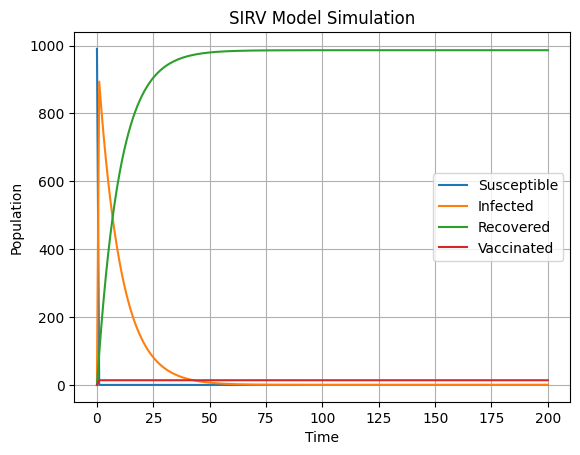

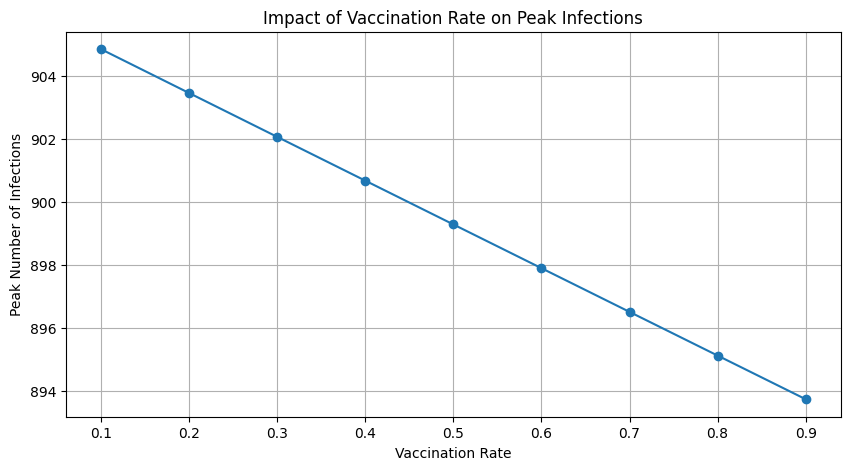

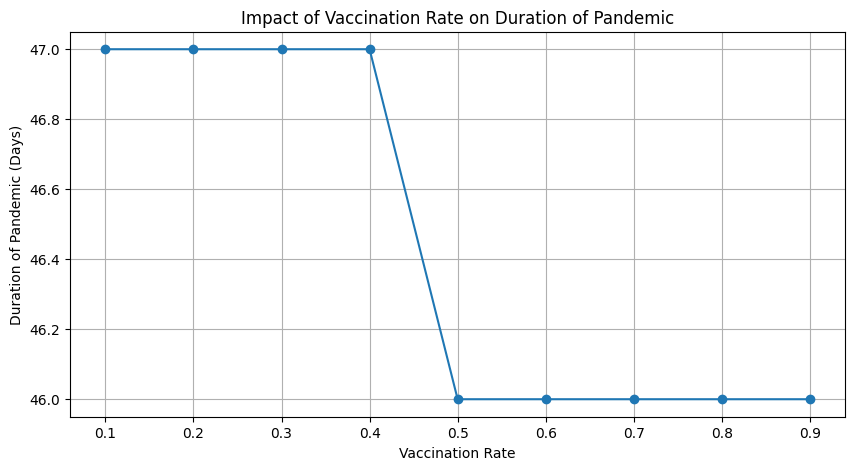

In [48]:
# Define the experiment parameters
vaccination_rates = np.arange(0.1, 1.0, 0.1)  # Range of vaccination rates
threshold = 10 # threshold for number of infections to drop below
days = 200  # Increase simulation time to ensure accurate results
S0, I0, R0, V0 = 990, 10, 0, 0  # Initial conditions
beta, gamma = 0.3, 0.1  # Infection and recovery rates

# Initialize lists to store results
peak_infections = []
duration_of_pandemic = []

# Run simulations for different vaccination rates
for nu in vaccination_rates:
    # Integrate the SIRV equations over the time grid
    t = np.linspace(0, days, days+1)
    y0 = [S0, I0, R0, V0]
    sol = odeint(sirv_model, y0, t, args=(beta, gamma, nu))
    S, I, R, V = sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3]
    
    # Find peak number of infections
    peak_infections.append(np.max(I))
    
    # Find time to reach threshold
    time_to_threshold = np.where(I < threshold)[0]
    if len(time_to_threshold) > 0:
        duration_of_pandemic.append(time_to_threshold[0])
    else:
        duration_of_pandemic.append(days)  # If threshold not reached, use maximum simulation time

# Print or visualize the results
print("Peak Infections (SIRV model with vaccination):", peak_infections)
print("Duration of Pandemic (SIRV model with vaccination):", duration_of_pandemic)

# Plot the results
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.plot(t, V, label='Vaccinated')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('SIRV Model Simulation')
plt.legend()
plt.grid(True)
plt.show()


# Plot peak infections
plt.figure(figsize=(10, 5))
plt.plot(vaccination_rates, peak_infections, marker='o')
plt.xlabel('Vaccination Rate')
plt.ylabel('Peak Number of Infections')
plt.title('Impact of Vaccination Rate on Peak Infections')
plt.grid(True)
plt.show()

# Plot duration of pandemic
plt.figure(figsize=(10, 5))
plt.plot(vaccination_rates, duration_of_pandemic, marker='o')
plt.xlabel('Vaccination Rate')
plt.ylabel('Duration of Pandemic (Days)')
plt.title('Impact of Vaccination Rate on Duration of Pandemic')
plt.grid(True)
plt.show()


In [24]:
# Define the SIR model without vaccination
def sir_model(y, t, beta, gamma):
    """
    Function to calculate the derivatives of the SIR model (without vaccination).

    Parameters:
        y: array containing the current values of the compartments [S, I, R]
        t: time
        beta: infection rate
        gamma: recovery rate
        
    Returns:
        dydt: array containing the derivatives of the compartments [dS/dt, dI/dt, dR/dt]
    """
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Define parameters
threshold = 10  # Threshold for number of infections to drop below
days = 200  # Simulation time
S0, I0, R0 = 990, 10, 0  # Initial conditions
beta, gamma = 0.3, 0.1  # Infection and recovery rates
vaccination_rate_fixed = 0.5  # Fixed vaccination rate for comparison

# Initialize lists to store results
peak_infections_sir = []
duration_of_pandemic_sir = []

# Run SIR model without vaccination
t = np.linspace(0, days, days+1)
y0 = [S0, I0, R0]
sol = odeint(sir_model, y0, t, args=(beta, gamma))
S, I, R = sol[:, 0], sol[:, 1], sol[:, 2]

# Find peak number of infections
peak_infections_sir.append(np.max(I))

# Find time to reach threshold
time_to_threshold = np.where(I < threshold)[0]
if len(time_to_threshold) > 0:
    duration_of_pandemic_sir.append(time_to_threshold[0])
else:
    duration_of_pandemic_sir.append(days)  # If threshold not reached, use maximum simulation time

# Print or visualize the results for SIR model without vaccination
print("Peak Infections (SIR model without vaccination):", peak_infections_sir)
print("Duration of Pandemic (SIR model without vaccination):", duration_of_pandemic_sir)





Peak Infections (SIR model without vaccination): [906.2280855514466]
Duration of Pandemic (SIR model without vaccination): [47]


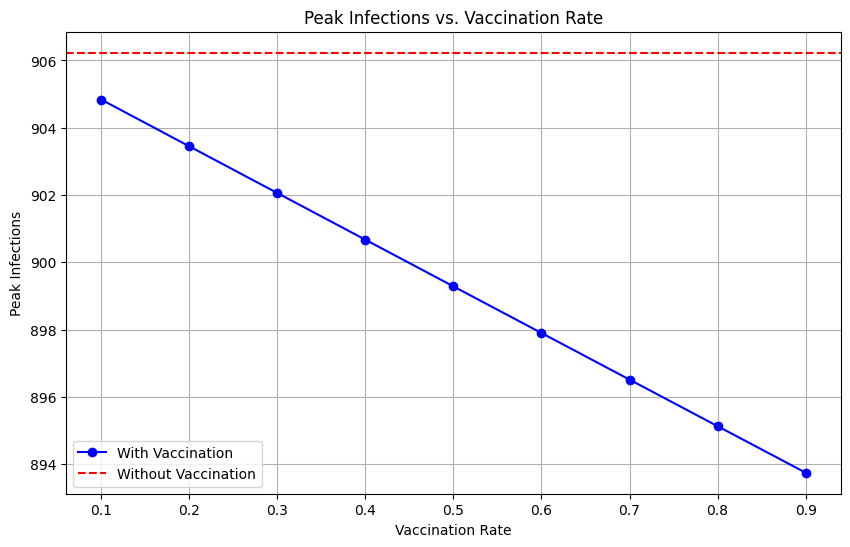

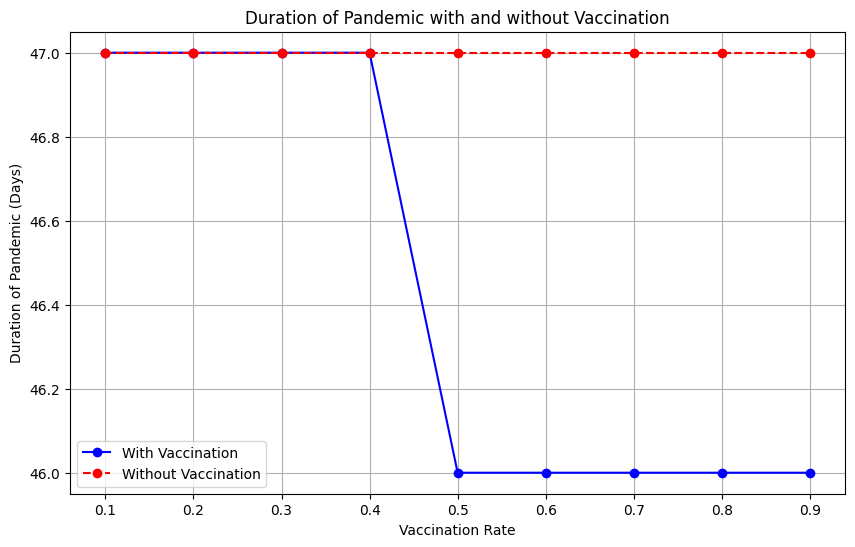

In [31]:
# Plot peak infections for SIRV model with vaccination and SIR model without vaccination
plt.figure(figsize=(10, 6))
plt.plot(vaccination_rates, peak_infections, marker='o', color='blue', linestyle='-', label='With Vaccination')
plt.axhline(y=peak_infections_sir[0], color='red', linestyle='--', label='Without Vaccination')
plt.title('Peak Infections vs. Vaccination Rate')
plt.xlabel('Vaccination Rate')
plt.ylabel('Peak Infections')
plt.legend()
plt.grid(True)
plt.show()


# Plotting duration of pandemic with and without vaccination
plt.figure(figsize=(10, 6))

# Plot with vaccination
plt.plot(vaccination_rates, duration_of_pandemic, marker='o', color='blue', linestyle='-', label='With Vaccination')

# Plot without vaccination
plt.plot(vaccination_rates, duration_of_pandemic_sir * len(vaccination_rates), marker='o', color='red', linestyle='--', label='Without Vaccination')

plt.title('Duration of Pandemic with and without Vaccination')
plt.xlabel('Vaccination Rate')
plt.ylabel('Duration of Pandemic (Days)')
plt.grid(True)
plt.legend()
plt.show()


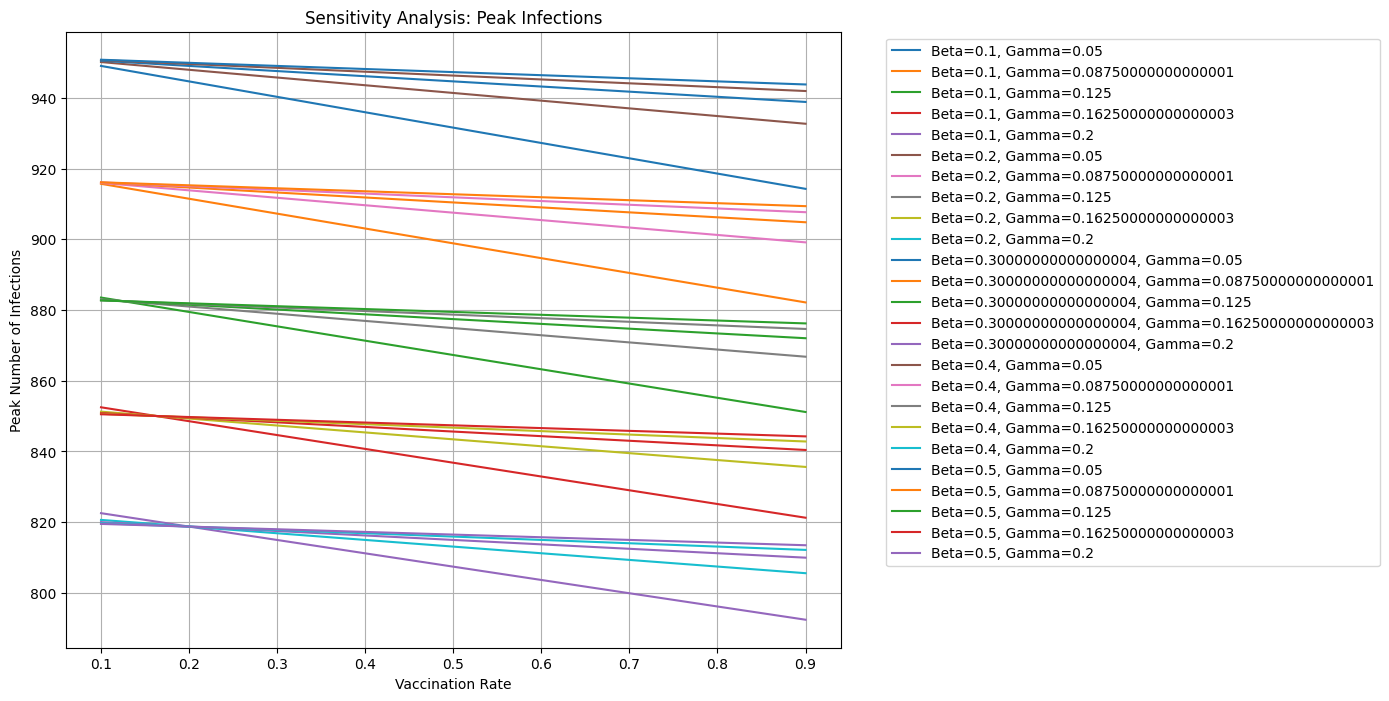

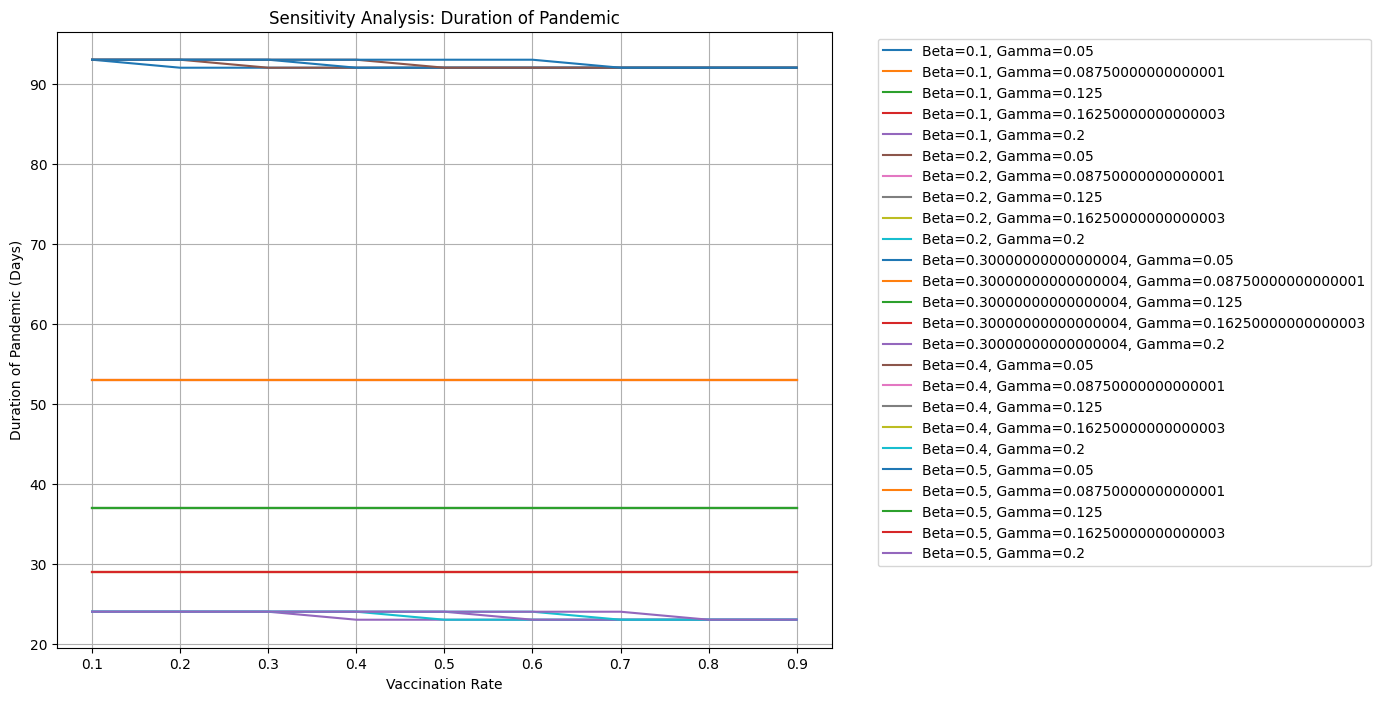

In [36]:
# Sensitivity Analysis

# Define the range of values for beta (infection rate) and gamma (recovery rate)
beta_values = np.linspace(0.1, 0.5, 5)
gamma_values = np.linspace(0.05, 0.2, 5)

# Initialize lists to store results
sensitivity_peak_infections = []
sensitivity_duration_of_pandemic = []

# Run simulations for different combinations of beta and gamma
for beta_val in beta_values:
    for gamma_val in gamma_values:
        # Run the SIRV model simulation
        peak_infections = []
        duration_of_pandemic = []
        for nu in vaccination_rates:
            t = np.linspace(0, days, days+1)
            y0 = [S0, I0, R0, V0]
            sol = odeint(sirv_model, y0, t, args=(beta_val, gamma_val, nu))
            S, I, R, V = sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3]
            peak_infections.append(np.max(I))
            time_to_threshold = np.where(I < threshold)[0]
            if len(time_to_threshold) > 0:
                duration_of_pandemic.append(time_to_threshold[0])
            else:
                duration_of_pandemic.append(days)
        sensitivity_peak_infections.append(peak_infections)
        sensitivity_duration_of_pandemic.append(duration_of_pandemic) 

# Visualize sensitivity analysis results
# Plot for peak infections
plt.figure(figsize=(10, 8))
for i in range(len(beta_values)):
    for j in range(len(gamma_values)):
        label = f'Beta={beta_values[i]}, Gamma={gamma_values[j]}'
        plt.plot(vaccination_rates, sensitivity_peak_infections[i*len(gamma_values)+j], label=label)

plt.xlabel('Vaccination Rate')
plt.ylabel('Peak Number of Infections')
plt.title('Sensitivity Analysis: Peak Infections')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Plot for duration of pandemic
plt.figure(figsize=(10, 8))
for i in range(len(beta_values)):
    for j in range(len(gamma_values)):
        label = f'Beta={beta_values[i]}, Gamma={gamma_values[j]}'
        plt.plot(vaccination_rates, sensitivity_duration_of_pandemic[i*len(gamma_values)+j], label=label)

plt.xlabel('Vaccination Rate')
plt.ylabel('Duration of Pandemic (Days)')
plt.title('Sensitivity Analysis: Duration of Pandemic')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [39]:
# Define objective function
def objective_function(params):
    """
    Objective function to minimize peak infections.
    
    Parameters:
        params: array containing beta and gamma values
        
    Returns:
        peak_infections: peak number of infections
    """
    beta, gamma = params
    
    # Define simulation parameters
    days = 200
    S0, I0, R0, V0 = 990, 10, 0, 0
    vaccination_rate = 0.5
    
    # Integrate the SIRV equations over the time grid
    t = np.linspace(0, days, days+1)
    y0 = [S0, I0, R0, V0]
    sol = odeint(sirv_model, y0, t, args=(beta, gamma, vaccination_rate))
    S, I, R, V = sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3]
    
    # Find peak number of infections
    peak_infections = np.max(I)
    
    return peak_infections

# Define decision variables
# beta: infection rate (0.1 to 0.5)
# gamma: recovery rate (0.05 to 0.2)
decision_variables = {
    'beta': (0.1, 0.5),
    'gamma': (0.05, 0.2)
}

# Formulate optimization problem
def optimization_problem(params):
    """
    Formulate the optimization problem.
    
    Parameters:
        params: array containing beta and gamma values
        
    Returns:
        peak_infections: peak number of infections
    """
    return objective_function(params)

# Select optimization technique
def optimize():
    """
    Select optimization technique and solve the optimization problem.
    
    Returns:
        result: optimized parameters (beta and gamma)
    """
    # Initial guess for beta and gamma
    initial_guess = [0.3, 0.1]
    
    # Define bounds for beta and gamma
    bounds = [decision_variables['beta'], decision_variables['gamma']]
    
    # Perform optimization
    result = minimize(optimization_problem, initial_guess, bounds=bounds)
    
    return result

# Solve optimization problem
result = optimize()
print("Optimized Parameters (Beta, Gamma):", result.x)
print("Minimum Peak Infections:", result.fun)


Optimized Parameters (Beta, Gamma): [0.1 0.2]
Minimum Peak Infections: 807.3934984523507


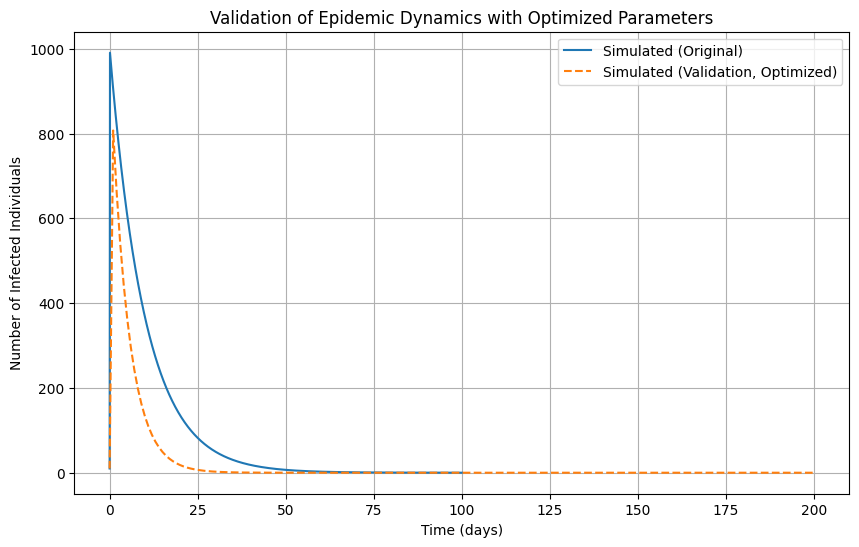

In [41]:
# Define parameters for validation simulation
validation_nu = 0.5  # Vaccination rate for validation
validation_days = 200  # Simulation time for validation

# Simulate epidemic dynamics using the optimized parameters for validation
validation_t = np.linspace(0, validation_days, validation_days+1)
validation_y0 = [S0, I0, R0, V0]
validation_sol_optimized = odeint(sirv_model, validation_y0, validation_t, args=(optimized_beta, optimized_gamma, validation_nu))
validation_I_optimized = validation_sol_optimized[:, 1]  # Infected individuals from validation simulation with optimized parameters

# Plot the simulated epidemic dynamics for validation with optimized parameters
plt.figure(figsize=(10, 6))
plt.plot(t, I, label='Simulated (Original)')
plt.plot(validation_t, validation_I_optimized, label='Simulated (Validation, Optimized)', linestyle='--')
plt.xlabel('Time (days)')
plt.ylabel('Number of Infected Individuals')
plt.title('Validation of Epidemic Dynamics with Optimized Parameters')
plt.legend()
plt.grid(True)
plt.show()


In [42]:
# Define the SIRV model with NPIs
def sirv_model_with_npis(y, t, beta, gamma, nu, alpha):
    """
    Function to calculate the derivatives of the SIRV model with non-pharmaceutical interventions (NPIs).
    
    Parameters:
        y: array containing the current values of the compartments [S, I, R, V]
        t: time
        beta: baseline infection rate
        gamma: recovery rate
        nu: vaccination rate
        alpha: effectiveness of NPIs (reduction factor)
        
    Returns:
        dydt: array containing the derivatives of the compartments [dS/dt, dI/dt, dR/dt, dV/dt]
    """
    S, I, R, V = y
    # Calculate the effective transmission rate accounting for NPIs
    beta_eff = beta * alpha
    # Calculate the derivatives of the compartments
    dSdt = -beta_eff * S * I - nu * S
    dIdt = beta_eff * S * I - gamma * I
    dRdt = gamma * I
    dVdt = nu * S
    return [dSdt, dIdt, dRdt, dVdt]

# Define the experiment parameters
vaccination_rates = np.arange(0.1, 1.0, 0.1)  # Range of vaccination rates
threshold = 10 # threshold for number of infections to drop below
days = 200  # Increase simulation time to ensure accurate results
S0, I0, R0, V0 = 990, 10, 0, 0  # Initial conditions
beta, gamma = 0.3, 0.1  # Baseline infection and recovery rates

# Define the effectiveness of NPIs (reduction factor)
alpha_values = np.arange(0.1, 1.1, 0.1)  # Range of effectiveness values for NPIs

# Initialize lists to store results
peak_infections_with_npis = []
duration_of_pandemic_with_npis = []

# Run simulations for different combinations of vaccination rates and NPI effectiveness
for alpha in alpha_values:
    for nu in vaccination_rates:
        # Integrate the SIRV equations over the time grid
        t = np.linspace(0, days, days+1)
        y0 = [S0, I0, R0, V0]
        sol = odeint(sirv_model_with_npis, y0, t, args=(beta, gamma, nu, alpha))
        S, I, R, V = sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3]
        
        # Find peak number of infections
        peak_infections_with_npis.append(np.max(I))
        
        # Find time to reach threshold
        time_to_threshold = np.where(I < threshold)[0]
        if len(time_to_threshold) > 0:
            duration_of_pandemic_with_npis.append(time_to_threshold[0])
        else:
            duration_of_pandemic_with_npis.append(days)

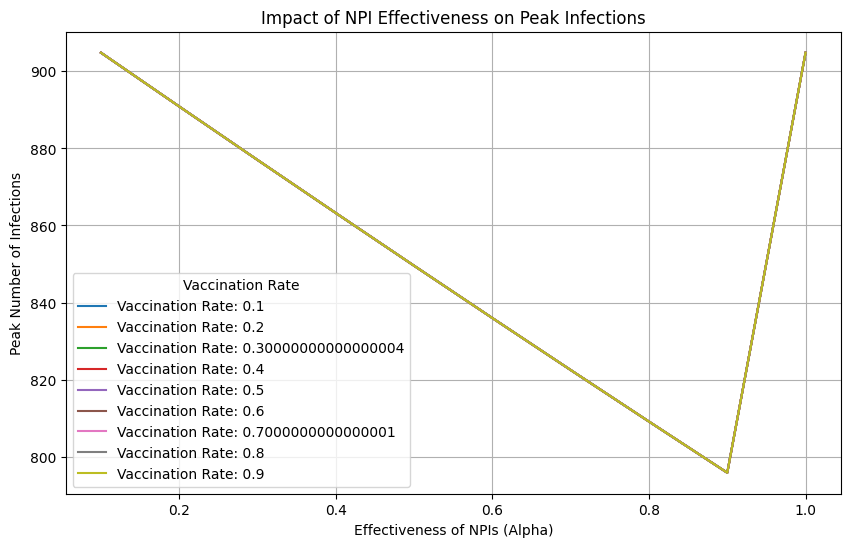

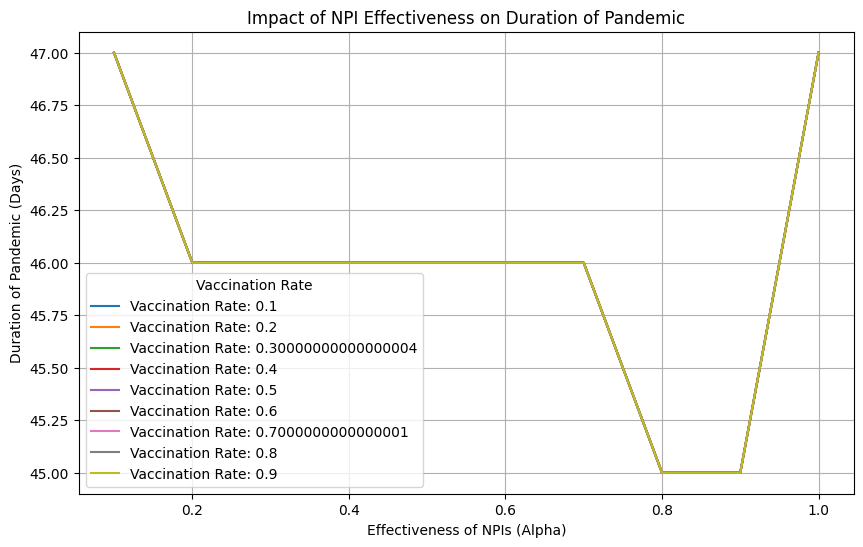

In [45]:
# Plot peak infections with NPIs
plt.figure(figsize=(10, 6))
for nu in vaccination_rates:
    plt.plot(alpha_values, peak_infections_with_npis[:len(alpha_values)], label=f'Vaccination Rate: {nu}')
plt.xlabel('Effectiveness of NPIs (Alpha)')
plt.ylabel('Peak Number of Infections')
plt.title('Impact of NPI Effectiveness on Peak Infections')
plt.legend(title='Vaccination Rate')
plt.grid(True)
plt.show()

# Plot duration of pandemic with NPIs
plt.figure(figsize=(10, 6))
for nu in vaccination_rates:
    plt.plot(alpha_values, duration_of_pandemic_with_npis[:len(alpha_values)], label=f'Vaccination Rate: {nu}')
plt.xlabel('Effectiveness of NPIs (Alpha)')
plt.ylabel('Duration of Pandemic (Days)')
plt.title('Impact of NPI Effectiveness on Duration of Pandemic')
plt.legend(title='Vaccination Rate')
plt.grid(True)
plt.show()


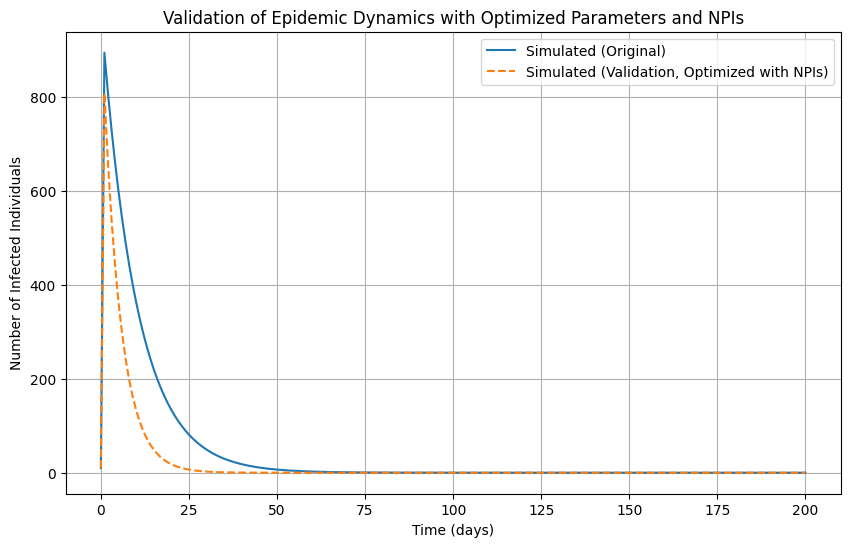

In [47]:
# Simulate epidemic dynamics using the optimized parameters for validation with NPIs
validation_t = np.linspace(0, validation_days, validation_days+1)
validation_y0 = [S0, I0, R0, V0]
validation_sol_optimized_npi = odeint(sirv_model_with_npis, validation_y0, validation_t, args=(optimized_beta, optimized_gamma, validation_nu, alpha))
validation_I_optimized_npi = validation_sol_optimized_npi[:, 1]  # Infected individuals from validation simulation with optimized parameters and NPIs

# Plot the simulated epidemic dynamics for validation with optimized parameters and NPIs
plt.figure(figsize=(10, 6))
plt.plot(t, I, label='Simulated (Original)')
plt.plot(validation_t, validation_I_optimized_npi, label='Simulated (Validation, Optimized with NPIs)', linestyle='--')
plt.xlabel('Time (days)')
plt.ylabel('Number of Infected Individuals')
plt.title('Validation of Epidemic Dynamics with Optimized Parameters and NPIs')
plt.legend()
plt.grid(True)
plt.show()
